# Basic features and readability scores
> Learn to compute basic features such as number of words, number of characters, average word length and number of special characters (such as Twitter hashtags and mentions). You will also learn to compute readability scores and determine the amount of education required to comprehend a piece of text. This is the Summary of lecture "Feature Engineering for NLP in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Natural_Language_Process]
- image: images/mention_count.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

## Introduction to NLP feature engineering

### One-hot encoding
We encountered a dataframe `df1` which contained categorical features and therefore, was unsuitable for applying ML algorithms to.

In this exercise, your task is to convert `df1` into a format that is suitable for machine learning.

In [2]:
df1 = pd.read_csv('./dataset/FE_df1.csv')

In [3]:
# Print the features of df1
print(df1.columns)

# Perform one-hot encoding
df1 = pd.get_dummies(df1, columns=['feature 5'])

# Print the new features of df1
print(df1.columns)

# Print first five rows of df1
print(df1.head())

Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'label'],
      dtype='object')
Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'label',
       'feature 5_female', 'feature 5_male'],
      dtype='object')
   feature 1  feature 2  feature 3  feature 4  label  feature 5_female  \
0    29.0000          0          0   211.3375      1                 1   
1     0.9167          1          2   151.5500      1                 0   
2     2.0000          1          2   151.5500      0                 1   
3    30.0000          1          2   151.5500      0                 0   
4    25.0000          1          2   151.5500      0                 1   

   feature 5_male  
0               0  
1               1  
2               0  
3               1  
4               0  


## Basic feature extraction

### Character count of Russian tweets
In this exercise, you have been given a dataframe `tweets` which contains some tweets associated with Russia's Internet Research Agency and compiled by FiveThirtyEight.

Your task is to create a new feature `'char_count'` in tweets which computes the number of characters for each tweet. Also, compute the average length of each tweet. The tweets are available in the `content` feature of `tweets`.

*Be aware that this is real data from Twitter and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real Twitter data).*

In [5]:
tweets = pd.read_csv('./dataset/russian_tweets.csv')
tweets.head()

,Unnamed: 0,content
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
2,226970,.@vfpatlas well that's a swella word there (di...
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
4,161610,Жители обстреливаемых районов Донецка проводят...


In [6]:
# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean())

103.462


Notice that the average character count of these tweets is approximately 104, which is much higher than the overall average tweet length of around 40 characters. Depending on what you're working on, this may be something worth investigating into. For your information, there is research that indicates that fake news articles tend to have longer titles! Therefore, even extremely basic features such as character counts can prove to be very useful in certain applications.

### Word count of TED talks
`ted` is a dataframe that contains the transcripts of 500 TED talks. Your job is to compute a new feature `word_count` which contains the approximate number of words for each talk. Consequently, you also need to compute the average word count of the talks. The transcripts are available as the `transcript` feature in `ted`.

In order to complete this task, you will need to define a function `count_words` that takes in a string as an argument and returns the number of words in the string. You will then need to apply this function to the `transcript` feature of `ted` to create the new feature `word_count` and compute its mean.

In [7]:
ted = pd.read_csv('./dataset/ted.csv')
ted.head()

,transcript,url
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...


In [8]:
# Function that returns number of words in a string
def count_words(string):
    # Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())

1987.1


You now know how to compute the number of words in a given piece of text. Also, notice that the average length of a talk is close to 2000 words. You can use the `word_count` feature to compute its correlation with other variables such as number of views, number of comments, etc. and derive extremely interesting insights about TED.

### Hashtags and mentions in Russian tweets
Let's revisit the tweets dataframe containing the Russian tweets. In this exercise, you will compute the number of hashtags and mentions in each tweet by defining two functions `count_hashtags()` and `count_mentions()` respectively and applying them to the content feature of tweets.

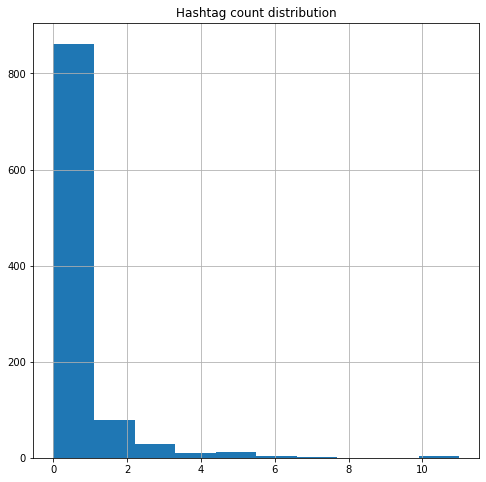

In [9]:
# Function that returns number of hashtags in a string
def count_hashtags(string):
    # Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_countand display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist();
plt.title('Hashtag count distribution');

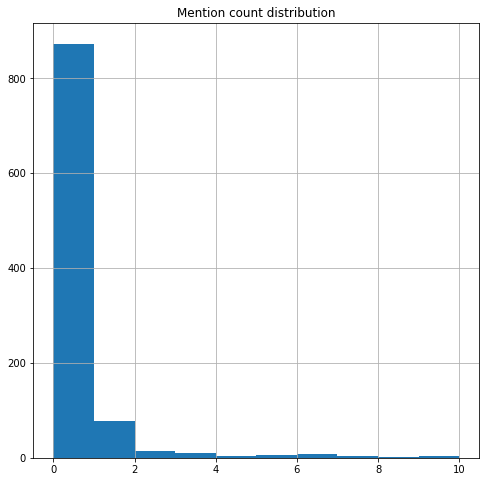

In [10]:
# Function that returns number of mentions in a string
def count_mentions(string):
    # Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist();
plt.title('Mention count distribution');

You now have a good grasp of how to compute various types of summary features. In the next lesson, we will learn about more advanced features that are capable of capturing more nuanced information beyond simple word and character counts.

## Readability tests
- Readability test
    - Determine readability of an English passage
    - Scale ranging from primary school up to college graduate level
    - A mathematical formula utilizing word, syllable and sentence count
    - Used in fake news and opinion spam detection
- Examples
    - Flesch reading ease
    - Gunning fog index
    - Simple Measure of Gobbledygook (SMOG)
    - Dale-Chall score
- Flesch reading ease
    - One of the oldest and most widely used tests
    - Dependent on two factors
        - Greater the average sentence length, harder the text is to read
        - Greater the average number of syllables in a word, harder the text is to read
    - Higher the score, greater the readability
- Gunning fog index
    - Developed in 1954
    - Also dependent on average sentence length
    - Greater the percentage of complex words, harder the text is to read
    - Higher the index, lesser the readability


### Readability of 'The Myth of Sisyphus'
In this exercise, you will compute the Flesch reading ease score for Albert Camus' famous essay The Myth of Sisyphus. We will then interpret the value of this score as explained in the video and try to determine the reading level of the essay.

In [11]:
with open('./dataset/sisyphus_essay.txt', 'r') as f:
    sisyphus_essay = f.read()
sisyphus_essay[:100]

'\nThe gods had condemned Sisyphus to ceaselessly rolling a rock to the top of a mountain, whence the '

In [12]:
from textatistic import Textatistic

# Compute the readability scores
readability_scores = Textatistic(sisyphus_essay).scores

# Print the flesch reading ease score
flesch = readability_scores['flesch_score']
print('The Flesch Reading Ease is %.2f' % (flesch))

The Flesch Reading Ease is 81.67


You now know to compute the Flesch reading ease score for a given body of text. Notice that the score for this essay is approximately 81.67. This indicates that the essay is at the readability level of a 6th grade American student.

### Readability of various publications
In this exercise, you have been given excerpts of articles from four publications. Your task is to compute the readability of these excerpts using the Gunning fog index and consequently, determine the relative difficulty of reading these publications.

The excerpts are available as the following strings:

- `forbes`- An excerpt from an article from Forbes magazine on the Chinese social credit score system.
- `harvard_law`- An excerpt from a book review published in Harvard Law Review.
- `r_digest`- An excerpt from a Reader's Digest article on flight turbulence.
- `time_kids` - An excerpt from an article on the ill effects of salt consumption published in TIME for Kids.

In [13]:
import glob
texts = []
text_list = glob.glob('./dataset/*.txt')

text_list

['./dataset/MobyDick.txt',
 './dataset/time_kids.txt',
 './dataset/alice.txt',
 './dataset/forbes.txt',
 './dataset/r_digest.txt',
 './dataset/english_stopwords.txt',
 './dataset/1984.txt',
 './dataset/sisyphus_essay.txt',
 './dataset/cab.txt',
 './dataset/wikipedia-vocabulary-utf8.txt',
 './dataset/grail.txt',
 './dataset/my_file.txt',
 './dataset/harvard_law.txt',
 './dataset/Sprint_Intraday.txt']

In [15]:
file_list = ['time_kids', 'forbes', 'r_digest', 'harvard_law']
for text in text_list:
    for f in file_list:
        if f in text:
            with open(text, 'r') as f:
                texts.append(f.read())
            
time_kids, forbes, r_digest, harvard_law = texts

In [16]:
# List of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]

# Loop through excerpts and compute gunning fog index
gunning_fog_scores = []
for excerpt in excerpts:
    readability_scores = Textatistic(excerpt).scores
    gunning_fog = readability_scores['gunningfog_score']
    gunning_fog_scores.append(gunning_fog)
    
# Print the gunning fog indices
print(gunning_fog_scores)

[14.436002482929858, 20.735401069518716, 11.085587583148559, 5.926785009861934]


Notice that the Harvard Law Review excerpt has the highest Gunning fog index; indicating that it can be comprehended only by readers who have graduated college. On the other hand, the Time for Kids article, intended for children, has a much lower fog index and can be comprehended by 5th grade students.